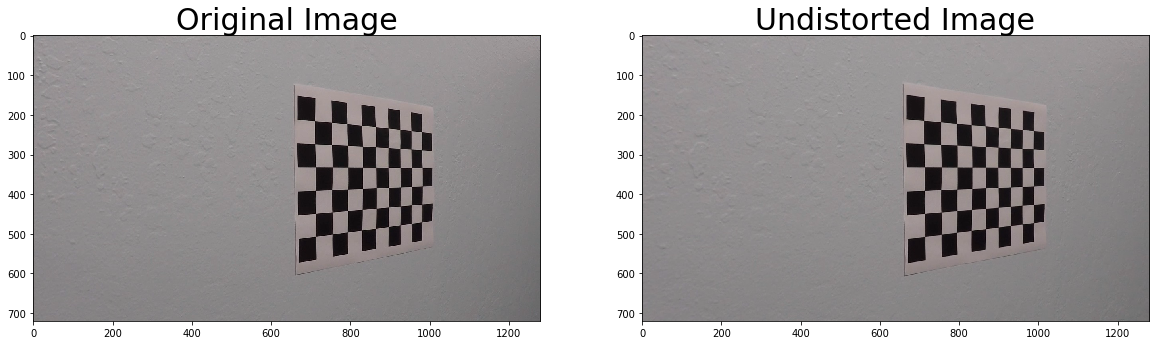

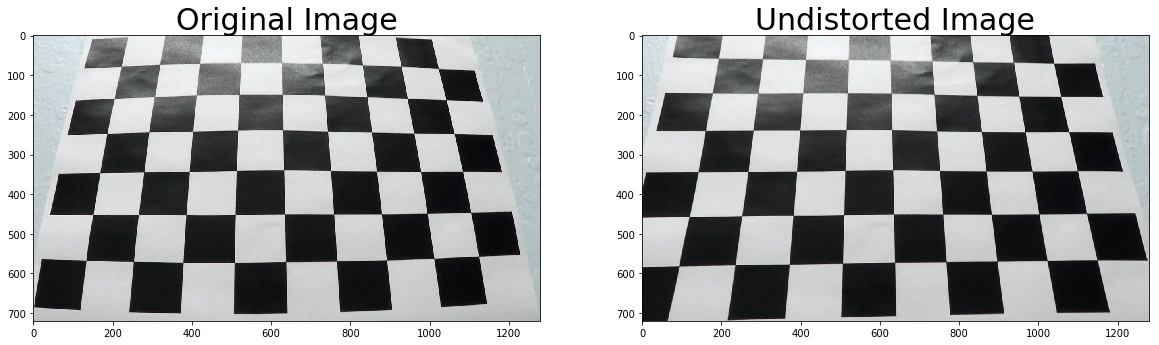

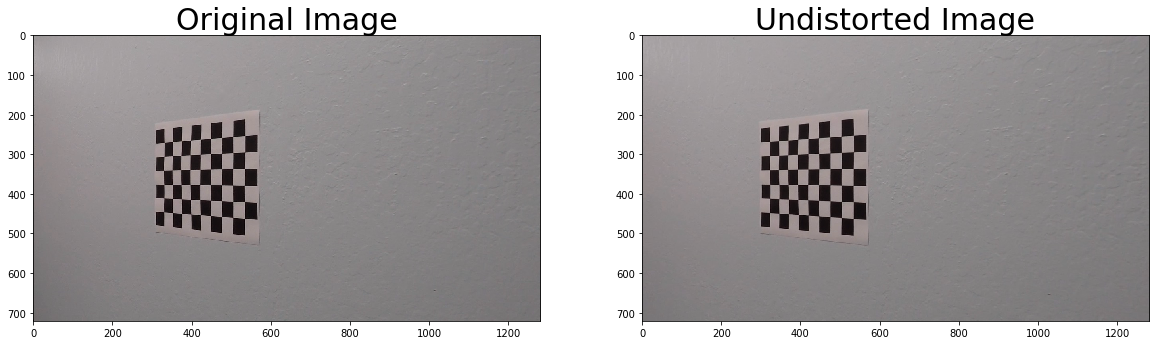

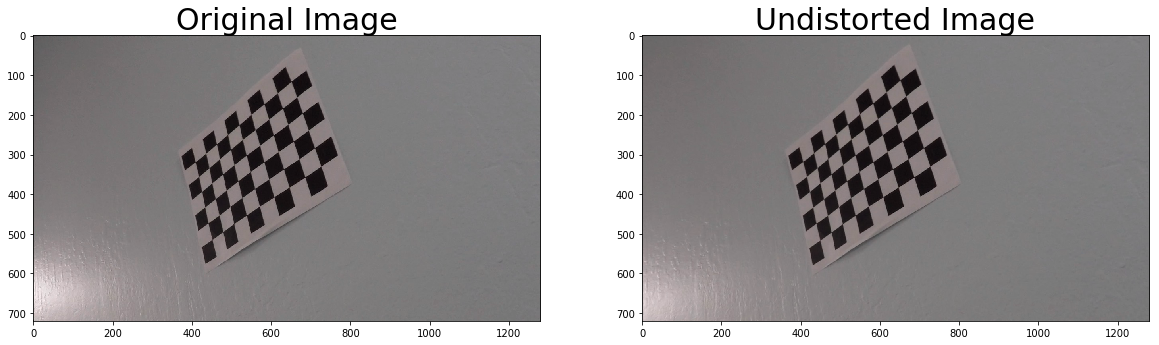

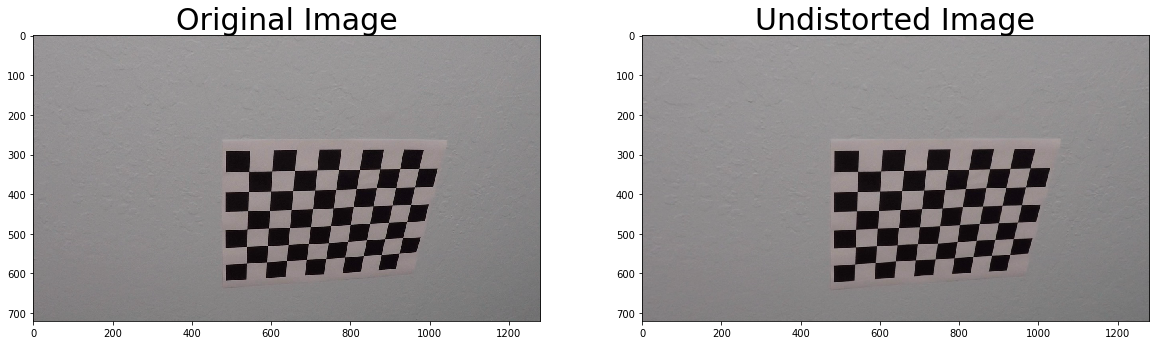

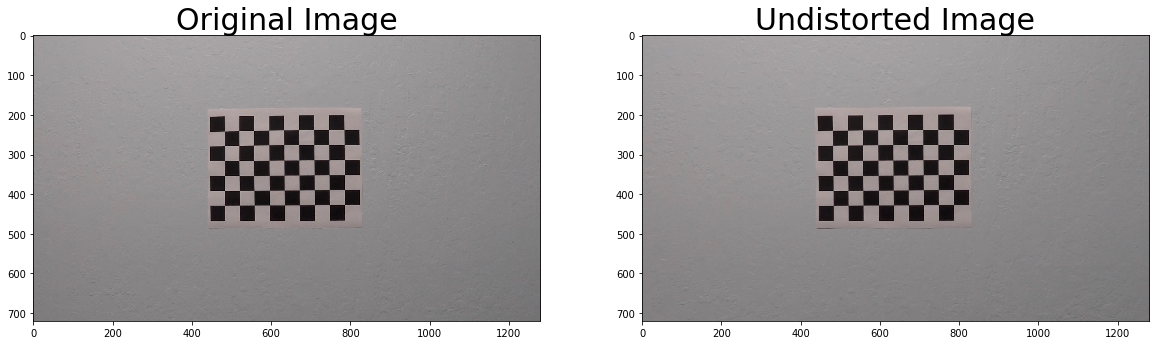

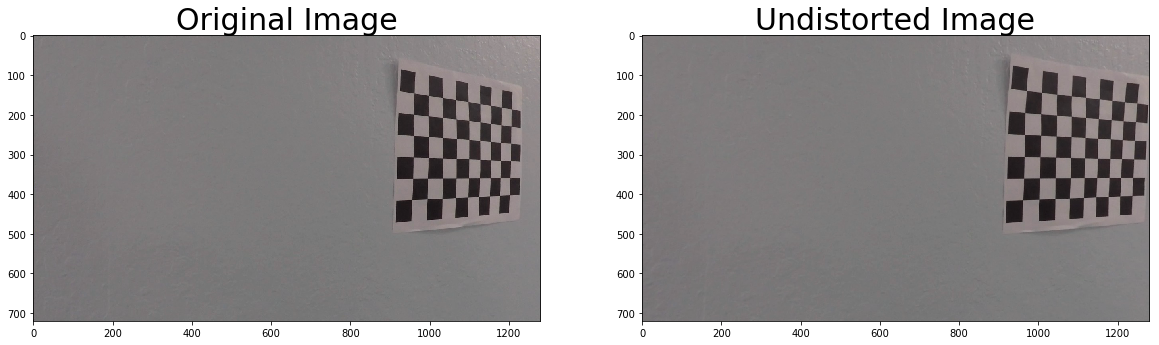

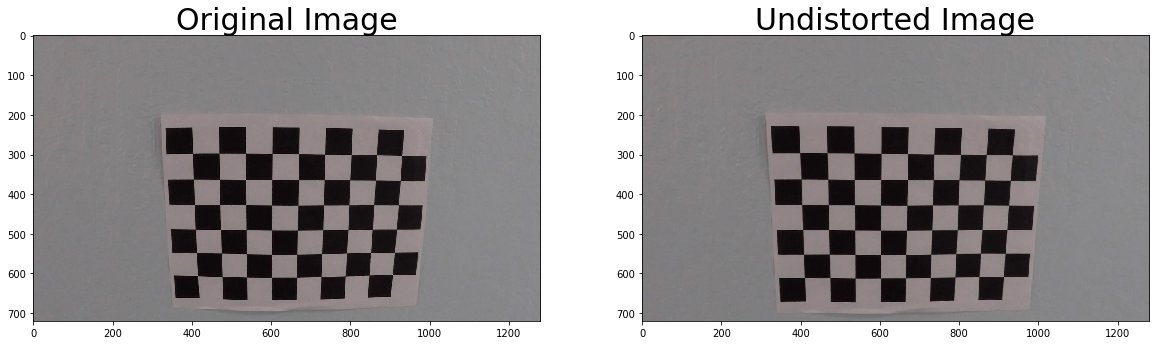

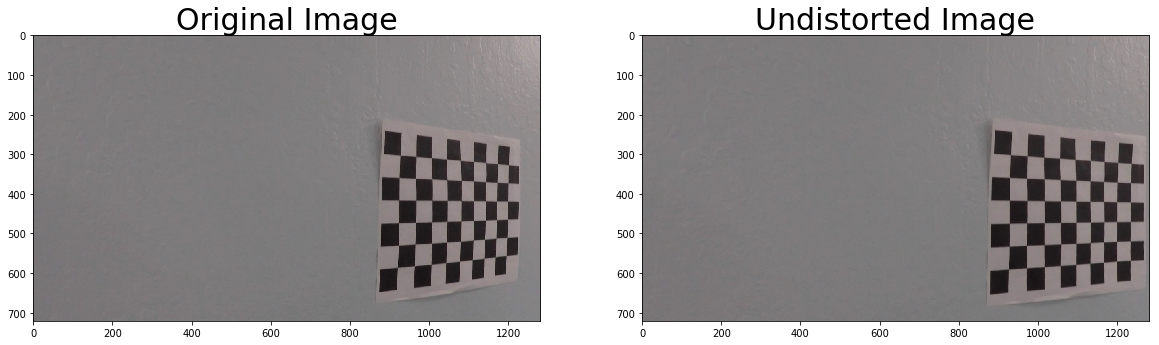

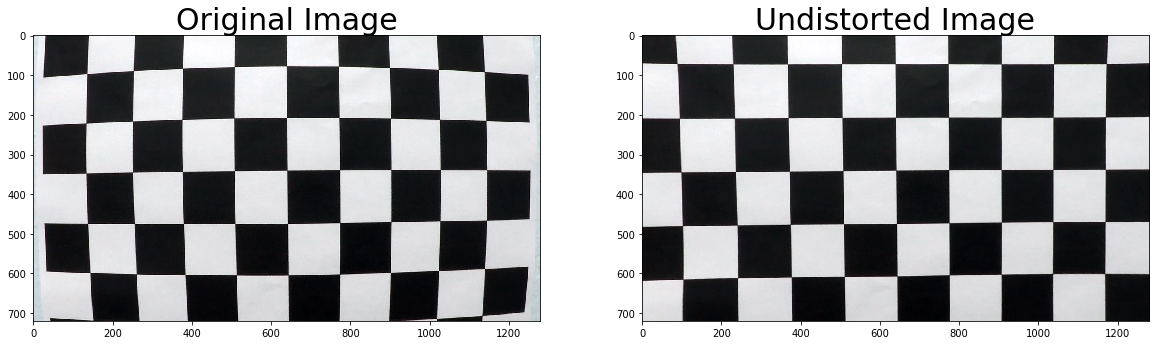

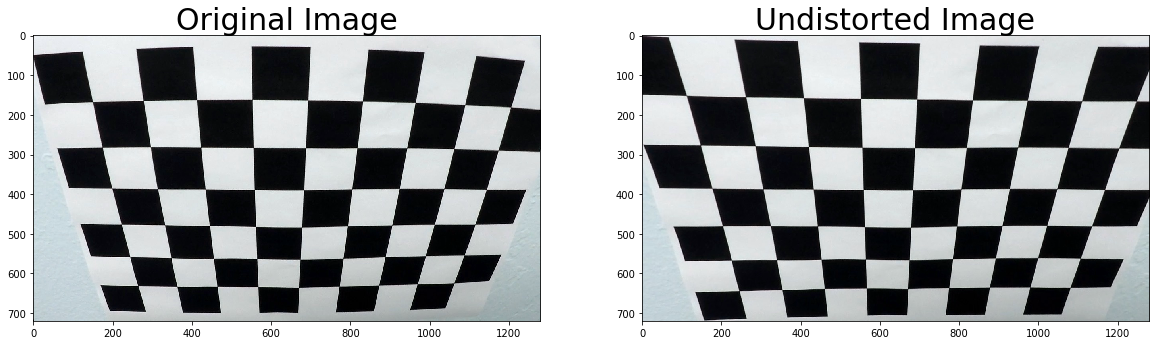

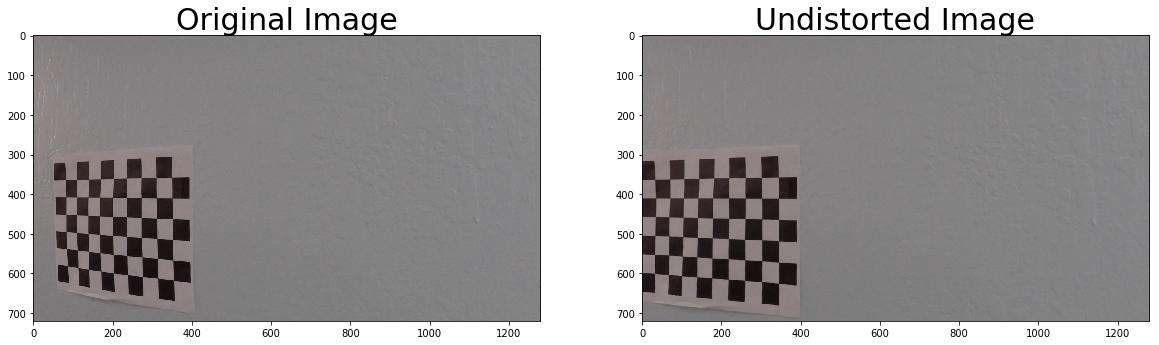

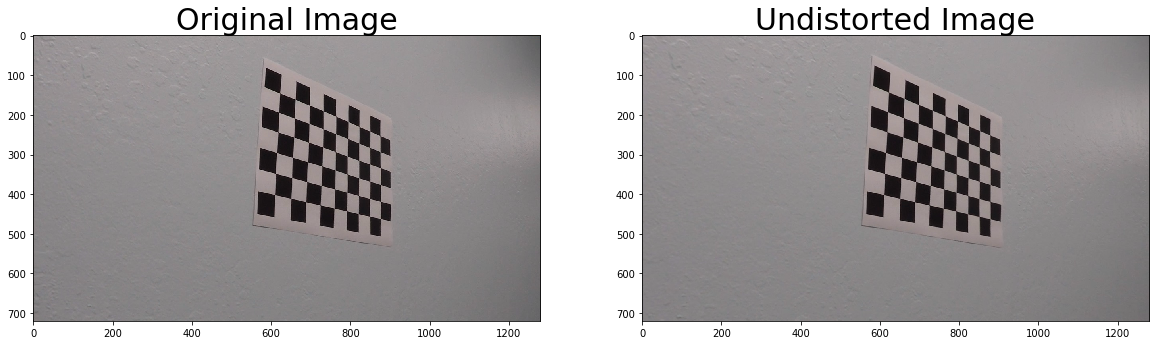

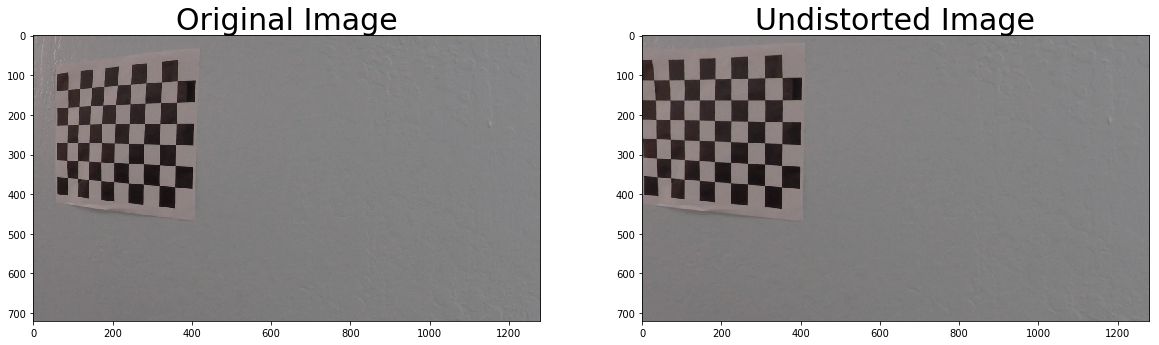

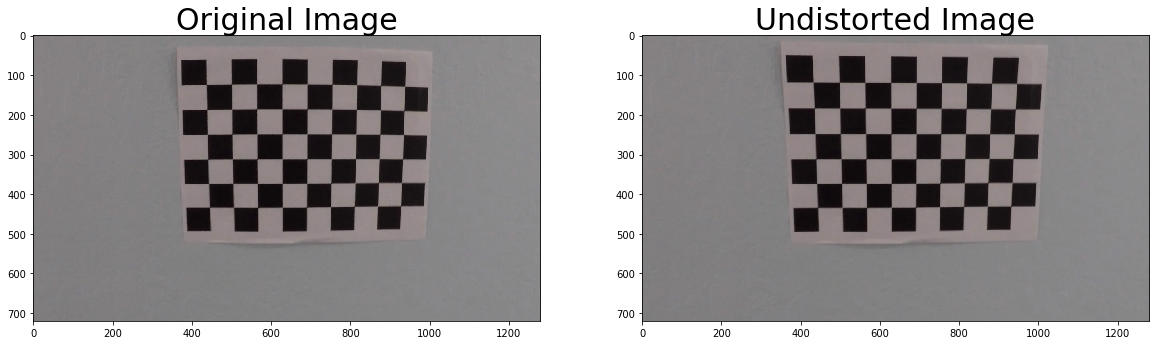

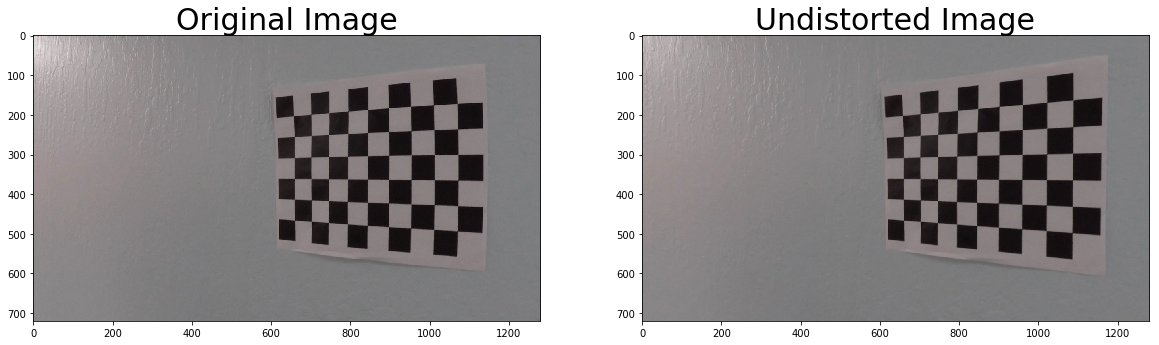

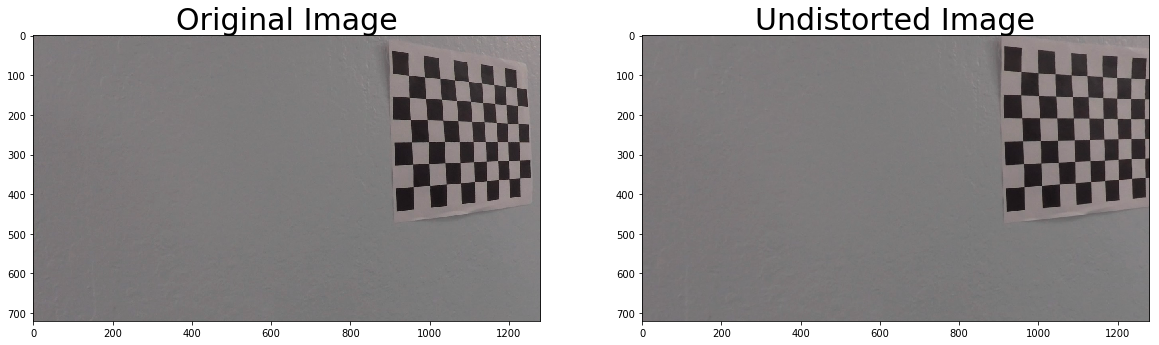

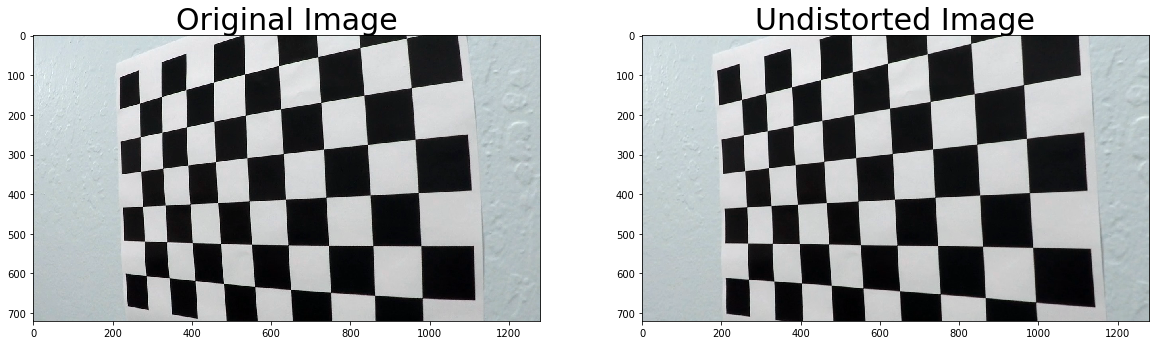

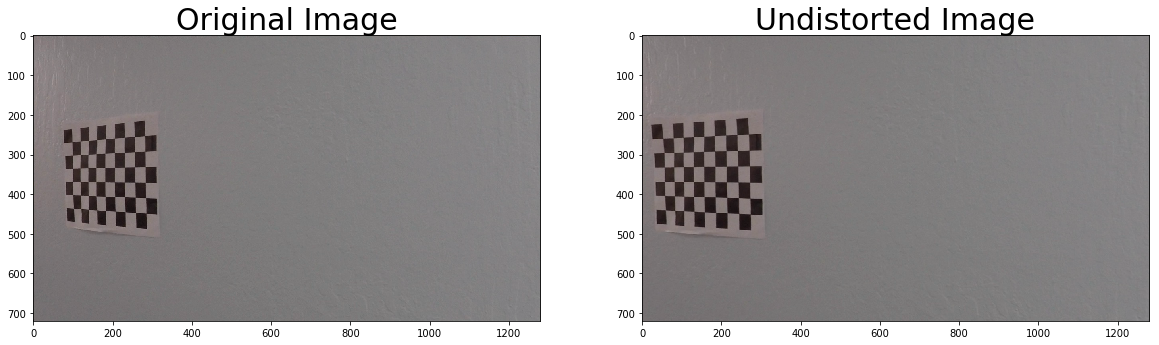

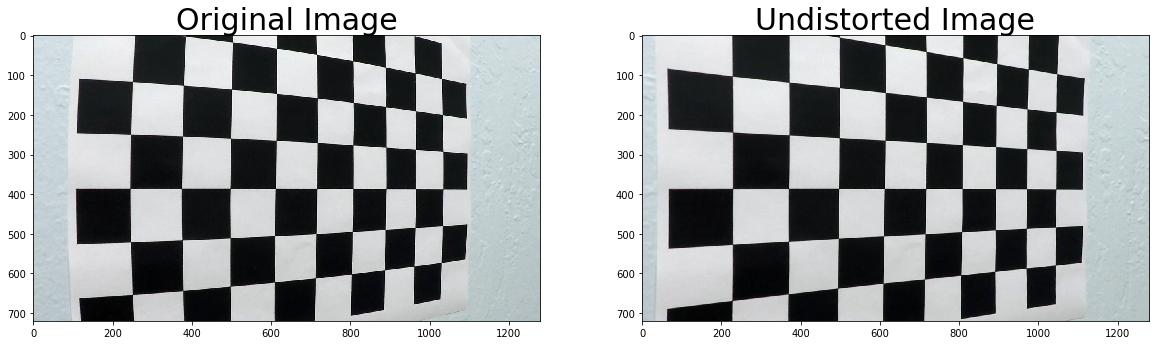

In [33]:
#################################################################
#################################################################

### The main objective of this code segment is to derive the following
### 1. Derive the object points and the image points from the calibration images
### 2. call the images in a loop to calculate the image and object points
### 3. append the array for the imgpoints and objpoints
### 4. use this array to calculate the Distortion co-efficient and the camera matrix
### 5. save camera calibration values using pickle
### 6. Test the calibration first on the calibration images and then on the Test images
### 7. Store images under output_images in their respective sub folders
### 8. comment out all the commands that were written to test the code

#################################################################
#################################################################

##################################################
#----Calculate Object points and image points----#
## -- Source:https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb
##################################################

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import os
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images and call all images from the calibration folder
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        #print ("----object points----")
        #print (objpoints)
        #print ("----image points----")
        #print (imgpoints)

        # Draw and display the corners
        #cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)

#cv2.destroyAllWindows()

##########################################
#----Calculate --------------------#
#----destortion coefficient--------#
#----camera matrix coefficient-----#
#----Store using Pickle------------#
## -- Source:https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb
##########################################

%matplotlib inline

images = glob.glob('camera_cal/calibration*.jpg')
# Test undistortion on an image
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])

    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    #print('----distortion----')
    #print(dist)
    #print('----Camera Matrix----')
    #print(mtx)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #cv2.imwrite('output_images/test1_undist.jpg',dst)

    # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )

    #check to see that pickle works

    #dist_pickle1 = pickle.load(open( "camera_cal/wide_dist_pickle.p", "rb" ))
    #print ("---unpickeled distortion-----")
    #print(dist_pickle1)
    ##img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)##
    ##dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)##
# Visualize undistortion
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)
    
    image_name= fname.split('/')
    resultImageName = 'result'+ image_name[1]
    plt.savefig(os.path.join('output_images/Before_After_undistort_calibration_images' , resultImageName))##


